In [1]:
import statistics
import string
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv("./movies-data/combine_data.csv")
df.head()

C:\Users\vuhoa\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,belongs_to_collection,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,...,vote_count,release_year,profit,weighted_rating,cast,director,keywords,userId,rating,timestamp
0,0,1,0.078947,"['Animation', 'Comedy', 'Family']",862,en,21.946943,['Pixar Animation Studios'],['United States of America'],1995-10-30 00:00:00,...,5415.0,1995.0,0.90409,7.684684,"['Tom Hanks', 'Tim Allen', 'Don Rickles']",John Lasseter,"['new toy', 'boy next door', 'toy comes to lif...",1923,3.0,858335006
1,1,1,0.078947,"['Animation', 'Comedy', 'Family']",862,en,21.946943,['Pixar Animation Studios'],['United States of America'],1995-10-30 00:00:00,...,5415.0,1995.0,0.90409,7.684684,"['Tom Hanks', 'Tim Allen', 'Don Rickles']",John Lasseter,"['new toy', 'boy next door', 'toy comes to lif...",2103,5.0,946044912
2,2,1,0.078947,"['Animation', 'Comedy', 'Family']",862,en,21.946943,['Pixar Animation Studios'],['United States of America'],1995-10-30 00:00:00,...,5415.0,1995.0,0.90409,7.684684,"['Tom Hanks', 'Tim Allen', 'Don Rickles']",John Lasseter,"['new toy', 'boy next door', 'toy comes to lif...",5380,1.0,878941641
3,3,1,0.078947,"['Animation', 'Comedy', 'Family']",862,en,21.946943,['Pixar Animation Studios'],['United States of America'],1995-10-30 00:00:00,...,5415.0,1995.0,0.90409,7.684684,"['Tom Hanks', 'Tim Allen', 'Don Rickles']",John Lasseter,"['new toy', 'boy next door', 'toy comes to lif...",6177,4.0,859415226
4,4,1,0.078947,"['Animation', 'Comedy', 'Family']",862,en,21.946943,['Pixar Animation Studios'],['United States of America'],1995-10-30 00:00:00,...,5415.0,1995.0,0.90409,7.684684,"['Tom Hanks', 'Tim Allen', 'Don Rickles']",John Lasseter,"['new toy', 'boy next door', 'toy comes to lif...",6525,4.0,857388995


In [3]:
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
df

,belongs_to_collection,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,...,vote_count,release_year,profit,weighted_rating,cast,director,keywords,userId,rating,timestamp
0,1,0.078947,"['Animation', 'Comedy', 'Family']",862,en,21.946943,['Pixar Animation Studios'],['United States of America'],1995-10-30 00:00:00,0.983037,...,5415.0,1995.0,0.90409,7.684684,"['Tom Hanks', 'Tim Allen', 'Don Rickles']",John Lasseter,"['new toy', 'boy next door', 'toy comes to lif...",1923,3.0,858335006
1,1,0.078947,"['Animation', 'Comedy', 'Family']",862,en,21.946943,['Pixar Animation Studios'],['United States of America'],1995-10-30 00:00:00,0.983037,...,5415.0,1995.0,0.90409,7.684684,"['Tom Hanks', 'Tim Allen', 'Don Rickles']",John Lasseter,"['new toy', 'boy next door', 'toy comes to lif...",2103,5.0,946044912
2,1,0.078947,"['Animation', 'Comedy', 'Family']",862,en,21.946943,['Pixar Animation Studios'],['United States of America'],1995-10-30 00:00:00,0.983037,...,5415.0,1995.0,0.90409,7.684684,"['Tom Hanks', 'Tim Allen', 'Don Rickles']",John Lasseter,"['new toy', 'boy next door', 'toy comes to lif...",5380,1.0,878941641
3,1,0.078947,"['Animation', 'Comedy', 'Family']",862,en,21.946943,['Pixar Animation Studios'],['United States of America'],1995-10-30 00:00:00,0.983037,...,5415.0,1995.0,0.90409,7.684684,"['Tom Hanks', 'Tim Allen', 'Don Rickles']",John Lasseter,"['new toy', 'boy next door', 'toy comes to lif...",6177,4.0,859415226
4,1,0.078947,"['Animation', 'Comedy', 'Family']",862,en,21.946943,['Pixar Animation Studios'],['United States of America'],1995-10-30 00:00:00,0.983037,...,5415.0,1995.0,0.90409,7.684684,"['Tom Hanks', 'Tim Allen', 'Don Rickles']",John Lasseter,"['new toy', 'boy next door', 'toy comes to lif...",6525,4.0,857388995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10933455,0,NaN,['Drama'],111109,tl,0.178241,['Sine Olivia'],['Philippines'],2011-11-17 00:00:00,NaN,...,3.0,2011.0,NaN,5.640155,"['Angel Aquino', 'Perry Dizon', 'Hazel Orencio']",Lav Diaz,"['artist', 'play', 'pinoy']",33940,2.5,1405878785
10933456,0,NaN,['Drama'],111109,tl,0.178241,['Sine Olivia'],['Philippines'],2011-11-17 00:00:00,NaN,...,3.0,2011.0,NaN,5.640155,"['Angel Aquino', 'Perry Dizon', 'Hazel Orencio']",Lav Diaz,"['artist', 'play', 'pinoy']",172224,3.0,1399502972
10933457,0,NaN,['Drama'],111109,tl,0.178241,['Sine Olivia'],['Philippines'],2011-11-17 00:00:00,NaN,...,3.0,2011.0,NaN,5.640155,"['Angel Aquino', 'Perry Dizon', 'Hazel Orencio']",Lav Diaz,"['artist', 'play', 'pinoy']",210792,3.0,1467090449
10933458,0,NaN,['Drama'],111109,tl,0.178241,['Sine Olivia'],['Philippines'],2011-11-17 00:00:00,NaN,...,3.0,2011.0,NaN,5.640155,"['Angel Aquino', 'Perry Dizon', 'Hazel Orencio']",Lav Diaz,"['artist', 'play', 'pinoy']",225396,3.5,1399302912


In [5]:
movies = df[['id', 'userId', 'rating', 'title']].drop_duplicates(keep='first')
movies

,id,userId,rating,title
0,862,1923,3.0,Toy Story
1,862,2103,5.0,Toy Story
2,862,5380,1.0,Toy Story
3,862,6177,4.0,Toy Story
4,862,6525,4.0,Toy Story
...,...,...,...,...
10933455,111109,33940,2.5,Century of Birthing
10933456,111109,172224,3.0,Century of Birthing
10933457,111109,210792,3.0,Century of Birthing
10933458,111109,225396,3.5,Century of Birthing


For easy reference, change column name of id to movieId in order to seperate from userId

In [6]:
movies = movies.rename(columns={"id": "movieId"})
movies

,movieId,userId,rating,title
0,862,1923,3.0,Toy Story
1,862,2103,5.0,Toy Story
2,862,5380,1.0,Toy Story
3,862,6177,4.0,Toy Story
4,862,6525,4.0,Toy Story
...,...,...,...,...
10933455,111109,33940,2.5,Century of Birthing
10933456,111109,172224,3.0,Century of Birthing
10933457,111109,210792,3.0,Century of Birthing
10933458,111109,225396,3.5,Century of Birthing


In [7]:
labelEncoder = LabelEncoder()
movies['movieId'] = labelEncoder.fit_transform(movies['movieId'])
movies.head()

,movieId,userId,rating,title
0,668,1923,3.0,Toy Story
1,668,2103,5.0,Toy Story
2,668,5380,1.0,Toy Story
3,668,6177,4.0,Toy Story
4,668,6525,4.0,Toy Story


<AxesSubplot:>

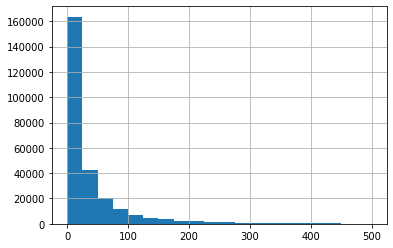

In [8]:
    ratings_per_user = movies.groupby('userId')['rating'].count()
    ratings_per_user.hist(bins=20, range=(0,500))

To verify, the average number of rating per users will be approximately 42 ratings

In [9]:
statistics.mean(ratings_per_user.tolist())

41.18715578358912

<AxesSubplot:>

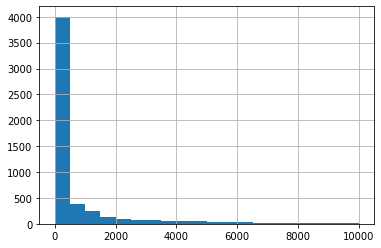

In [10]:
ratings_per_movies = movies.groupby('movieId')['rating'].count()
ratings_per_movies.hist(bins=20, range=(0,10000))

In [11]:
statistics.mean(ratings_per_movies.tolist())

1917.4780778674149

In user-based collaborative filtering, vectors representing users are essentially lists of the ratings they’ve given. So the more anime in our universe, the more dimensionality per user
That's why we should reduce dimensions by removing redundant users and movies

In [12]:
ratings_per_movies_df = pd.DataFrame(ratings_per_movies)
#Remove all movies which have less than 2000 ratings
cleaned_ratings_per_movies_df = ratings_per_movies_df[ratings_per_movies_df.rating >= 1000]
popular_movies = cleaned_ratings_per_movies_df.index.tolist()

In [13]:
ratings_per_user_df = pd.DataFrame(ratings_per_user)
#Remove all users which have voted less than 50 ratings
cleaned_ratings_per_movies_df = ratings_per_movies_df[ratings_per_movies_df.rating >= 20]
moviesholic_users = cleaned_ratings_per_movies_df.index.tolist()

In [14]:
filtered_ratings = movies[movies.userId.isin(moviesholic_users)]
filtered_ratings = filtered_ratings[filtered_ratings.movieId.isin(popular_movies)]
filtered_ratings

,movieId,userId,rating,title
497,742,174,4.0,Heat
498,742,346,4.0,Heat
499,742,362,4.0,Heat
500,742,384,4.0,Heat
501,742,463,2.0,Heat
...,...,...,...,...
10926693,1669,4433,4.0,Frankenstein Created Woman
10926696,1669,4578,4.0,Frankenstein Created Woman
10926698,1669,4831,2.0,Frankenstein Created Woman
10926702,1669,4996,3.0,Frankenstein Created Woman


In [16]:
len(filtered_ratings)

152474

In [17]:
rating_matrix = filtered_ratings.pivot_table(index='userId', columns='movieId', values='rating')
# replace NaN values with 0
rating_matrix = rating_matrix.fillna(0)
# display the top few rows
rating_matrix

movieId,0,1,2,3,4,5,6,7,8,9,...,4678,4753,4758,4819,4939,5036,5106,5204,5278,5585
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5632,0.0,0.0,5.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
filtered_ratings['movieId' == 2]

KeyError: False

In [ ]:
for movieId in rating_matrix[2].index:
    if rating_matrix[2][movieId] != 0:
        if movieId in rating_matrix[5625].index:
            print(movieId)

In [ ]:
def pearson_correlation(first_user, second_user):
    both_rated = {}
    for movieId in rating_matrix[second_user].index:
        if rating_matrix[second_user][movieId] != 0:
            if rating_matrix[first_user][movieId] != 0:
                    both_rated[movieId] = True

    mutual_ratings = len(both_rated)
    #We should check if the user do have anything in common. If not, return 0.
    if mutual_ratings == 0:
        return 0

    #Calculating the sum of all ratings of each user
    first_user_ratings_sum = sum([rating_matrix[first_user][movieId] for movieId in both_rated])
    second_user_ratings_sum = sum([rating_matrix[second_user][movieId] for movieId in both_rated])

    #Calculate the sum of squares of ratings for each user
    first_user_squared_ratings_sum = sum([rating_matrix[first_user][movieId] ** 2 for movieId in both_rated])
    second_user_squared_ratings_sum = sum([rating_matrix[second_user][movieId]**2 for movieId in both_rated])

    #Calculate the product value of both ratings of each item
    product_ratings_both_users = sum([rating_matrix[first_user][movieId] * rating_matrix[second_user][movieId] for movieId in both_rated])

    #Calculate the pearson score
    denominator = sqrt(((first_user_squared_ratings_sum - first_user_ratings_sum**2)/mutual_ratings) *
                       ((second_user_squared_ratings_sum - second_user_ratings_sum **2)/mutual_ratings))
    #Check if the denominator of Pearson correlation equation is zero. If true, return 0.
    if denominator == 0:
        return 0
    numerator = product_ratings_both_users - (first_user_ratings_sum * second_user_ratings_sum / mutual_ratings)
    return numerator/denominator

# pearson_correlation(2, 5625)

In [ ]:
def get_k_similar_users(target_user, k):
    # Used list comprehension for finding pearson similarity between users
    scores = [(pearson_correlation(target_user,other_person),other_person) for other_person in rating_matrix.columns if other_person != target_user]

    #sort the scores in descending order
    scores.sort(reverse=True)

    #return the scores between the target person & other persons
    return scores[0:k]

In [ ]:
def calculate_average(user):
    return statistics.mean(rating_matrix[user])

average_ratings = {}
for user in rating_matrix.columns:
    average_ratings[user] = calculate_average(user)

In [ ]:
def calculate_movie_score(user, item, k_nearest_neighbors):
    if not len(k_nearest_neighbors):
        return item, 0.0
    top_result = 0.0
    bottom_result = 0.0
    for neighbor in k_nearest_neighbors:
        neighbor_id = neighbor[1]
        neighbor_similarity = neighbor[0]   # Wi1
        rating = rating_matrix[neighbor_id][item] # rating i,item
        top_result += neighbor_similarity * (float(rating) - average_ratings[neighbor_id])
        bottom_result += neighbor_similarity
    if bottom_result == 0.0 :
        return item, 0.0
    result = average_ratings[user] + top_result/bottom_result
    return item, result

In [ ]:
def recommendator_model(user, k=3):
    # This method will obtain k movies that user has not seen before based on User-based CF.
    k_nearest_neighbors = get_k_similar_users(user, 20)
    result = []
    for movie in rating_matrix.index:
        if rating_matrix[user][movie] == 0:
            movie, score = calculate_movie_score(user, movie, k_nearest_neighbors)
            result.append((score, movie))
    result = sorted(result, key=lambda result: (result[0], result[1]), reverse=True)
    titles = movies[['movieId', 'title']].drop_duplicates(keep='first')
    final_result = []
    for item in result:
        title = titles[titles['movieId'] == item[1]]['title'][titles.index[titles["movieId"] == item[1]].tolist()[0]]
        final_result.append((item[0], item[1], title))
    return final_result[:k]

In [340]:
recs = recommendator_model(user=1, k=10)
for rec in recs:
    print('Movie title: ' + rec[2] + '---->' + str(rec[0]) + '\n')

Movie titleOrgy of the Dead---->1.152922865006468

Movie titleBarton Fink---->0.8897842411867473

Movie titleOutside the Law---->0.8876644326723391

Movie titleBordertown---->0.8344169595639983

Movie titleFear and Loathing in Las Vegas---->0.8059664150697575

Movie title¡Three Amigos!---->0.8055874461968074

Movie titleIndecent Proposal---->0.7950293564595383

Movie titleThe Bride Goes Wild---->0.7845842898012189

Movie titleThe Atomic States Of America---->0.7812831608597198

Movie titleEternal Sunshine of the Spotless Mind---->0.7732070404928991



In [315]:
filtered_ratings

,movieId,userId,rating,title
497,742,174,4.0,Heat
498,742,346,4.0,Heat
499,742,362,4.0,Heat
500,742,384,4.0,Heat
501,742,463,2.0,Heat
...,...,...,...,...
10926693,1669,4433,4.0,Frankenstein Created Woman
10926696,1669,4578,4.0,Frankenstein Created Woman
10926698,1669,4831,2.0,Frankenstein Created Woman
10926702,1669,4996,3.0,Frankenstein Created Woman
